# Advertising Sales Channel Prediction

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv('Advertising.csv', index_col=[0])

First 5 entries

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Last 5 Entries

In [4]:
df.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 4)

The dataset contains 200 rows and 4 columns

Datatype of the features

In [6]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

Information about the features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


# Missing Values

In [8]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

Heatmap of the null values.

<AxesSubplot:>

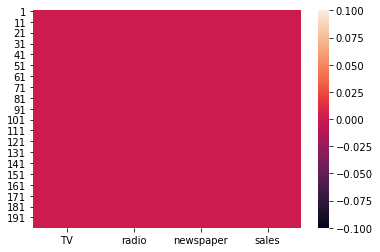

In [9]:
sns.heatmap(df.isnull())

There are no null values in the dataset.

In [10]:
df1=df.copy()

In [11]:
df1.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [12]:
df1 = pd.melt(df1, id_vars="sales", var_name="Media", value_name="Expense")
df1.head()

,sales,Media,Expense
0,22.1,TV,230.1
1,10.4,TV,44.5
2,9.3,TV,17.2
3,18.5,TV,151.5
4,12.9,TV,180.8


In [13]:
df1.tail()

,sales,Media,Expense
595,7.6,newspaper,13.8
596,9.7,newspaper,8.1
597,12.8,newspaper,6.4
598,25.5,newspaper,66.2
599,13.4,newspaper,8.7


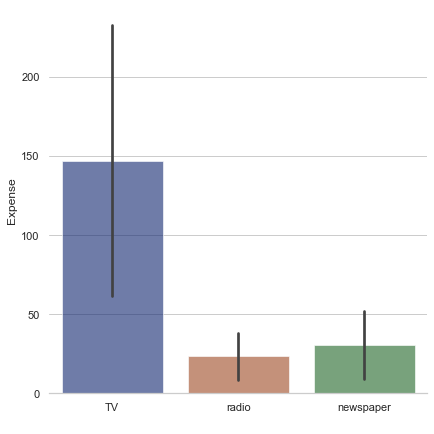

In [14]:
sns.set_theme(style="whitegrid")
g=sns.catplot(data=df1,kind="bar",x="Media",y="Expense",ci="sd",palette="dark",alpha=.6,height=6)
g.despine(left=True)
g.set_axis_labels(" ","Expense")

Expense of TV is largest followed by newspaper and lowest for radio.

# Statistical Summary

In [15]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Max value of newspaper is very high than the 75th percentile indicating presence of outlier.
Min value of only radio is zero.
Mean is less than 75th percentile indicating skewness.

Statistical heatmap

<AxesSubplot:>

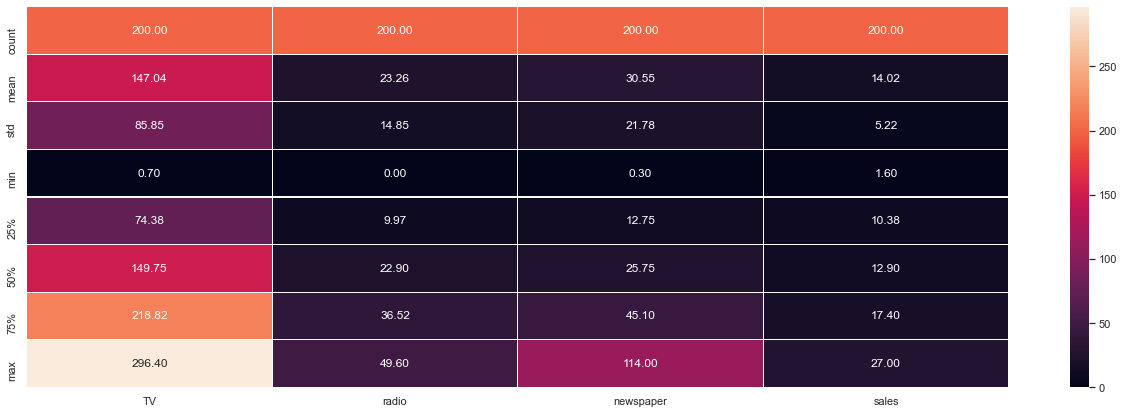

In [16]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

# Checking Correlation

In [17]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Heatmap of correlation

<AxesSubplot:>

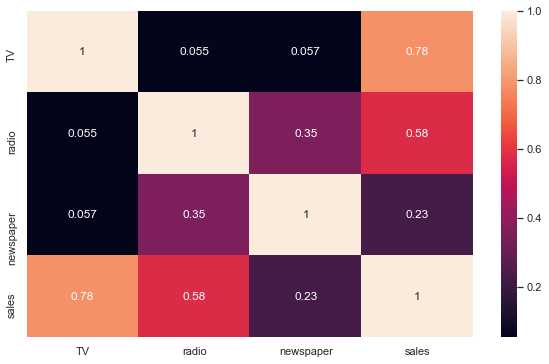

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Highest correlation is between TV and sales follwed by radio and sales. Heatmap shows positive correlation between all the features.

correlation plot

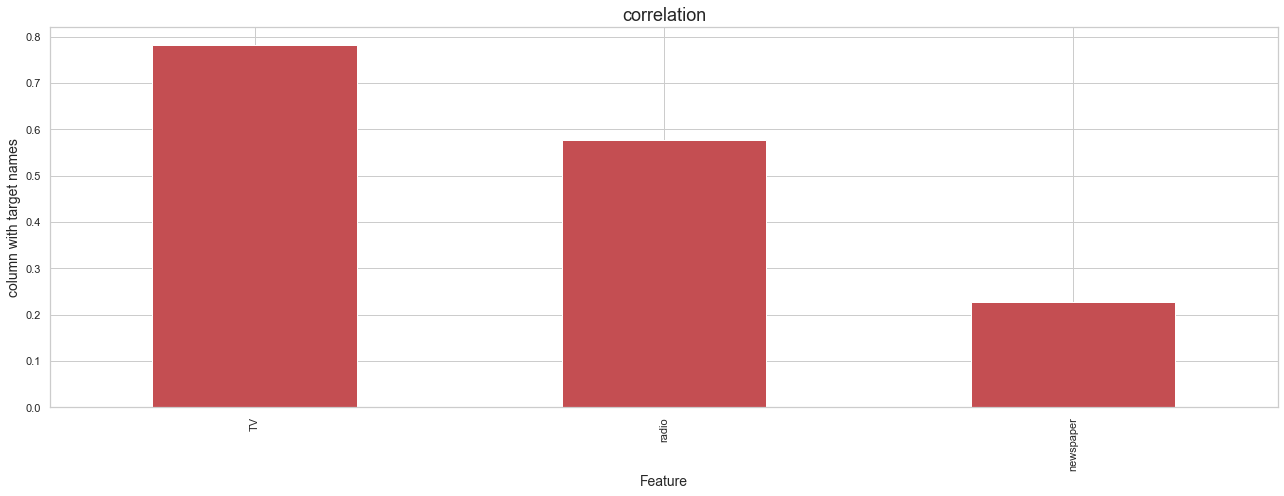

In [19]:
plt.figure(figsize=(22,7))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color="r")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

correlation of TV is highest with sales. all the features shows positive correlation with target variable.

# Distribution Plot

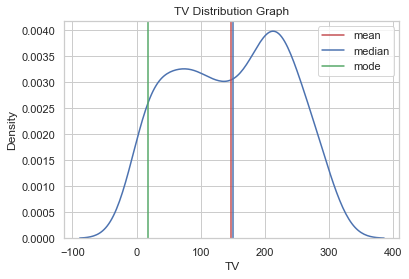

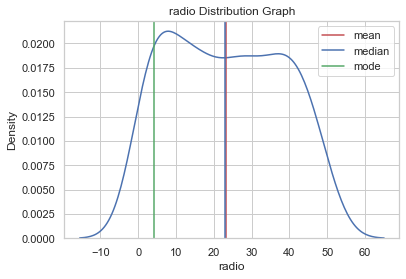

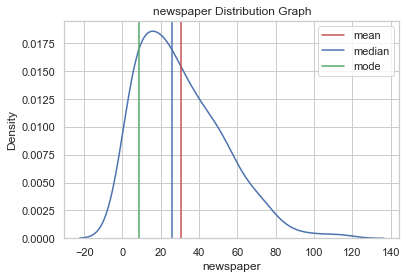

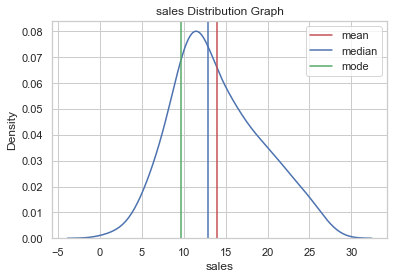

In [20]:
def custom_dist_plots(df):
    for col in df.columns:
        sns.distplot(df[col],hist=False).set_title(f"{col} Distribution Graph")
        plt.axvline(df[col].mean(),color='r',label='mean')
        plt.axvline(np.median(df[col]),color='b',label='median')
        plt.axvline(df[col].mode()[0],color='g',label='mode')
        plt.legend()
        plt.show()
custom_dist_plots(df)

1.Mean and Median of TV and radio are nearly equal. Both show bimodal normal distribution.
2.Newspaper and sales graph shows mean and median are different and away from each other. It shows skewness in its distribution.


# Bivariate Analysis

Scatter plot of TV with respect to sales shows positive linear relationship between them indicating increase in expense of TV also increases sales.

<AxesSubplot:xlabel='TV', ylabel='sales'>

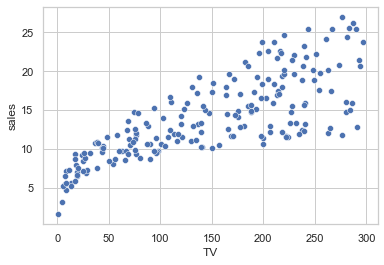

In [21]:
sns.scatterplot(x='TV', y='sales', data=df)

The scatterplot below suggests that radio and sales are positively correlated whereas distribution is little 
scattered which shows relationshipp is not as strong as TV. 

<AxesSubplot:xlabel='radio', ylabel='sales'>

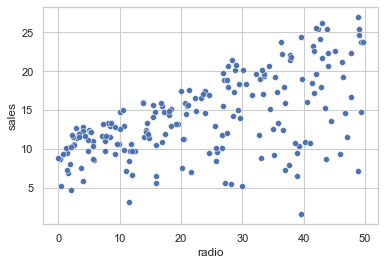

In [22]:
sns.scatterplot(x='radio', y='sales', data=df)

The scatter plot below doesn't give much of information as points are scttered and doesn't show a particular relationship.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

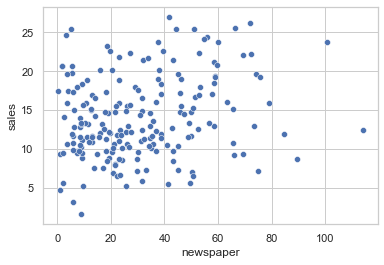

In [23]:
sns.scatterplot(x='newspaper', y='sales', data=df)

# Multivariate Analysis

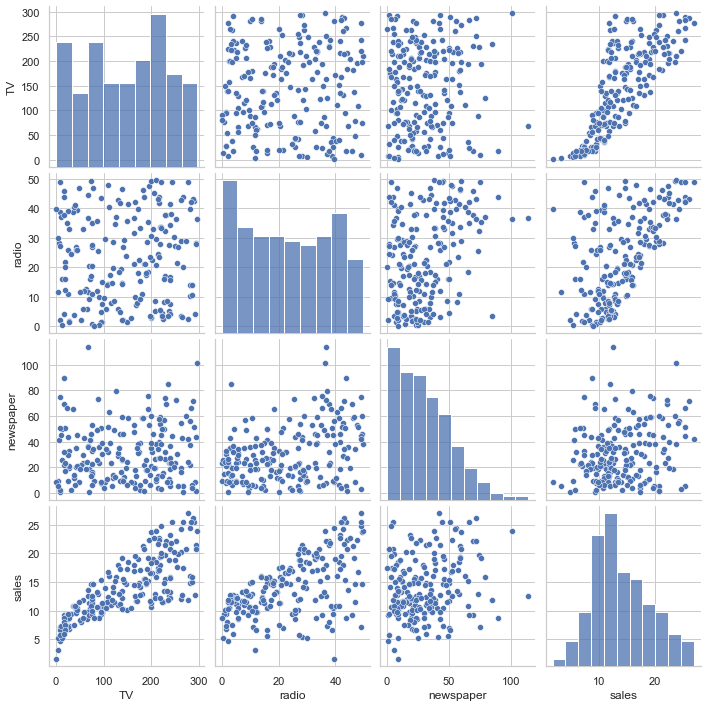

In [24]:
sns.pairplot(df)

Pairplot shows linear relationship TV and sales also between radio and sales.

# Box Plots showing outliers

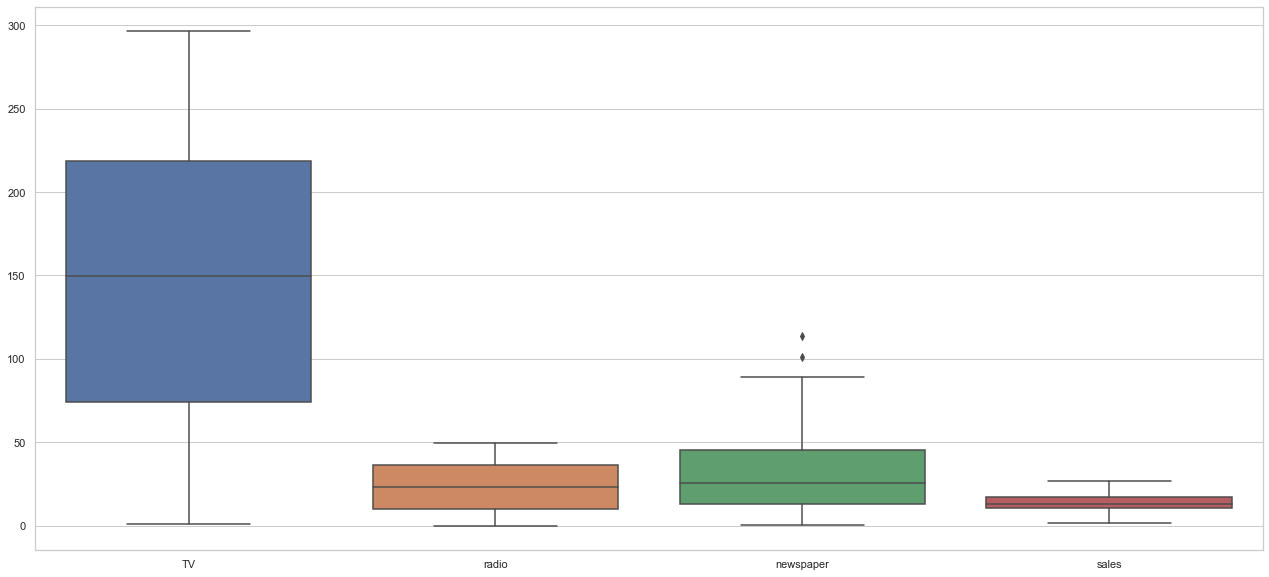

In [25]:
plt.figure(figsize=(22,10))
ax = sns.boxplot(data=df, orient="v")

Boxplots shows that newspaper variable has two outliers.

# Separating x(Independent) and y(target) variable.

In [ ]:
x = df.drop('sales', axis=1)
y = df['sales']

# Removing Skewness

In [27]:
x.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
dtype: float64

In [28]:
df['newspaper']=np.sqrt(df['newspaper'])
df['newspaper'].skew()

0.06238771883281062

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [30]:
x.head()

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802


# Finding the best random state

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
lr=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:0.9065727532450596
At random state0,the testing accuracy is:0.8649018906637791


At random state1,the training accuracy is:0.8850053786777522
At random state1,the testing accuracy is:0.9224605706201436


At random state2,the training accuracy is:0.9294705638285602
At random state2,the testing accuracy is:0.8041157295965823


At random state3,the training accuracy is:0.9046393841056695
At random state3,the testing accuracy is:0.8760893953712908


At random state4,the training accuracy is:0.8890066696510228
At random state4,the testing accuracy is:0.9127220729596172


At random state5,the training accuracy is:0.8997682984995
At random state5,the testing accuracy is:0.8868821951328664


At random state6,the training accuracy is:0.907242024188774
At random state6,the testing accuracy is:0.8598585513768164


At random state7,the training accuracy is:0.8970470429900155
At random state7,the testing accuracy is:0.8894586465158204


At random state8,the

# Train Test Split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=13)

# Finding best model

# Linear Regression

In [33]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [34]:
lm.intercept_

13.913570731529191

In [35]:
lm.score(x_train,y_train)

0.8761514926449974

In [36]:
pred=lm.predict(x_test)
print("Predicted Sales:",pred)
print("Actual Sales:",y_test)

Predicted Sales: [12.32720332  5.06197319 16.54033378 12.29411692 12.62278573 23.77502276
 21.59981913 14.80997483 22.11179258 15.26764663 16.21691643  5.92778598
  7.67540049 18.86288675 17.71169701 16.71181584  8.15245271  9.57831643
 20.2276226  17.70912934 11.92163063  7.73217589 21.67515203 11.97950563
 17.17473605 19.444878    9.97576933 14.32642791 23.31633305  8.51144235
 15.41978096 18.34247836 17.76781632  6.88977405 16.78491899  8.69467039
  9.91771591 20.70148766  5.1951983  10.34315527  8.98878062 18.93049909
 21.00172579  3.40790628 15.67442002 21.07539661 19.11565385  9.96482352
 10.3319019  21.22486232 20.88600927  9.20109396  9.75756367 13.92903527
  7.54934969 14.04423509 23.22831804  7.36101863  4.28463794  8.25717521]
Actual Sales: 180    12.6
156     3.2
24     15.5
160    12.9
97     11.7
199    25.5
43     20.7
111    13.4
129    24.7
98     15.5
96     16.9
107     7.2
66      9.3
34     17.4
103    14.8
90     16.7
133     5.7
80     11.0
105    20.7
71     18.

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("r2 Score:",r2_score(y_test,pred))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 Score: 0.933219070930032
Error:
Mean Absolute Error: 1.2175973442613899
Mean Squared Error: 2.116230321929836
Root Mean Squared Error: 1.4547268891203724


# Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)


DecisionTreeRegressor()

In [41]:
dtr.score(x_train,y_train)

1.0

In [43]:
dtr.score(x_test,y_test)

0.967123333781261

In [42]:
preddtr=dtr.predict(x_test)
print("Predicted Sales:",preddtr)
print("Actual Sales:",y_test)

Predicted Sales: [12.9  1.6 15.7 13.2 12.8 26.2 19.8 12.9 23.8 14.9 17.1  7.3  9.7 15.9
 15.  15.3  4.8 11.9 20.2 19.  13.2  9.7 19.6 11.6 17.6 19.6 10.5 11.6
 22.1  5.5 15.3 17.1 17.2  8.7 17.2  9.7 10.3 23.7  9.7 12.4  8.7 19.8
 21.7  5.6 11.6 21.5 18.4 11.3  8.8 22.1 19.6  9.7 10.9 12.3  8.7 15.5
 22.1  6.6  7.3  9.7]
Actual Sales: 180    12.6
156     3.2
24     15.5
160    12.9
97     11.7
199    25.5
43     20.7
111    13.4
129    24.7
98     15.5
96     16.9
107     7.2
66      9.3
34     17.4
103    14.8
90     16.7
133     5.7
80     11.0
105    20.7
71     18.3
174    11.7
130     9.7
31     21.4
8      13.2
169    17.1
125    19.7
158    10.1
166    11.9
102    23.8
79      5.3
88     16.0
142    19.2
106    19.2
11      8.6
65     18.0
14      9.7
91     11.2
16     22.4
196     7.6
95     11.5
126    10.6
69     18.9
70     22.3
109     5.3
132    12.7
112    21.8
93     19.4
145    11.4
13      9.2
94     22.2
138    20.8
52     10.7
19     11.3
101    11.7
33      9.6
20 

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("r2 Score:",r2_score(y_test,preddtr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2 Score: 0.967123333781261
Error:
Mean Absolute Error: 0.8249999999999997
Mean Squared Error: 1.0418333333333325
Root Mean Squared Error: 1.0207023725520248


# SVR

In [46]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [47]:
svr.score(x_train,y_train)

0.9042181305897635

In [48]:
predsvr=svr.predict(x_test)
print("Predicted Sales:",predsvr)
print("Actual Sales:",y_test)

Predicted Sales: [12.16421831  8.76039333 15.51126001 12.88154903 11.78339979 20.25330498
 18.21626127 13.36699356 19.44147196 15.59949089 17.27377139  8.2788116
 10.00702439 16.71272105 14.30383637 16.58680166  9.55264562 10.3834726
 19.66824897 18.71770894 11.68238188  9.76110641 19.08247192 12.75393736
 16.71847139 18.20731035 10.34131542 13.55783525 15.26289205  9.1061707
 15.51877204 18.00300003 18.02480898  8.8671895  17.40813468 10.15623619
 10.63521314 21.2598313   8.39268987 11.26033313 10.0504431  18.7387641
 21.71902153  8.31501267 12.66466481 21.40258131 19.50432308 11.02200038
 10.18688428 19.24913779 18.60695466 10.67749489 10.42160155 12.57577115
  9.55710895 14.8159707  21.06191674  8.6344537   8.34411227  9.97364455]
Actual Sales: 180    12.6
156     3.2
24     15.5
160    12.9
97     11.7
199    25.5
43     20.7
111    13.4
129    24.7
98     15.5
96     16.9
107     7.2
66      9.3
34     17.4
103    14.8
90     16.7
133     5.7
80     11.0
105    20.7
71     18.3
17

In [58]:
print("r2 Score:",r2_score(y_test,predsvr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

r2 Score: 0.8632997780582803
Error:
Mean Absolute Error: 1.245818231574567
Mean Squared Error: 4.331912698975932
Root Mean Squared Error: 2.081324746159506


# Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [51]:
rfr.score(x_train,y_train)

0.995143933646748

In [52]:
predrfr=rfr.predict(x_test)
print("Predicted Sales:",predrfr)
print("Actual Sales:",y_test)

Predicted Sales: [13.184  4.298 15.423 12.704 11.861 24.47  19.471 12.795 23.001 15.23
 17.92   7.158  9.768 16.36  14.124 14.773  5.266 10.832 20.106 18.33
 12.349  9.884 19.709 12.619 17.095 19.945 10.737 11.794 21.719  5.286
 14.485 18.356 17.153  9.098 16.81  10.083 11.008 22.835  8.712 12.178
 10.    19.196 22.02   6.141 11.669 22.464 19.081 11.726  8.404 21.426
 19.968 10.443 10.706 12.282  9.667 15.398 23.105  7.131  7.022  9.974]
Actual Sales: 180    12.6
156     3.2
24     15.5
160    12.9
97     11.7
199    25.5
43     20.7
111    13.4
129    24.7
98     15.5
96     16.9
107     7.2
66      9.3
34     17.4
103    14.8
90     16.7
133     5.7
80     11.0
105    20.7
71     18.3
174    11.7
130     9.7
31     21.4
8      13.2
169    17.1
125    19.7
158    10.1
166    11.9
102    23.8
79      5.3
88     16.0
142    19.2
106    19.2
11      8.6
65     18.0
14      9.7
91     11.2
16     22.4
196     7.6
95     11.5
126    10.6
69     18.9
70     22.3
109     5.3
132    12.7
112 

In [66]:
print("r2 Score:",r2_score(y_test,predrfr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2 Score: 0.9771644451293384
Error:
Mean Absolute Error: 0.6741999999999995
Mean Squared Error: 0.723639133333333
Root Mean Squared Error: 0.8506698145187315


# Cross Validation

In [54]:
from sklearn.model_selection import cross_val_score
lrs=cross_val_score(lm,x,y,scoring='r2',cv=5)
print(lrs)
print('LinearRegression cross_val_score:',lrs.mean())

[0.87865198 0.91763212 0.92933032 0.81443904 0.89547829]
LinearRegression cross_val_score: 0.8871063495438435


In [55]:
drs=cross_val_score(dtr,x,y,scoring='r2',cv=5)
print(drs)
print('LinearRegression cross_val_score:',drs.mean())

[0.95694937 0.95219733 0.94960207 0.94357412 0.96366646]
LinearRegression cross_val_score: 0.9531978695957368


In [60]:
svs=cross_val_score(svr,x,y,scoring='r2',cv=5)
print(svs)
print('LinearRegression cross_val_score:',svs.mean())

[0.89985983 0.9464921  0.90928964 0.82899857 0.92371706]
LinearRegression cross_val_score: 0.9016714405804581


In [56]:
rfs=cross_val_score(rfr,x,y,scoring='r2',cv=5)
print(rfs)
print('LinearRegression cross_val_score:',rfs.mean())

[0.98152127 0.98418606 0.97136379 0.96115167 0.97859646]
LinearRegression cross_val_score: 0.9753638485494065


The difference between cross validation and accuracy score is for random forest regressor . Therefore it is our best model.

# Hyperparameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2'],'bootstrap': [True, False],
            'min_samples_leaf' : [1, 2, 4],'min_samples_split': [2, 5, 10]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'mae', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [74]:
rf=RandomForestRegressor(bootstrap=True, criterion='mae', max_features= 'auto', min_samples_leaf= 1, min_samples_split= 2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

R2 score: 97.71681887881152


# Plot of Random Forest Regression

<function matplotlib.pyplot.show(close=None, block=None)>

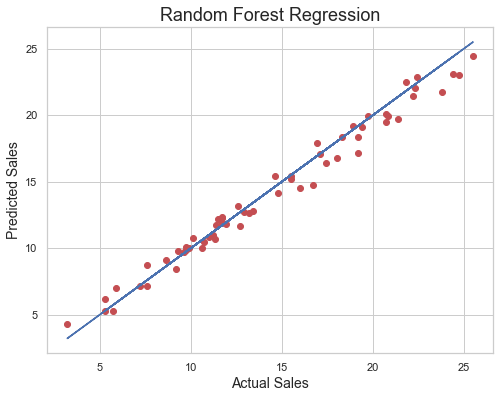

In [75]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrfr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Sales',fontsize=14)
plt.ylabel('Predicted Sales',fontsize=14)
plt.title('Random Forest Regression',fontsize=18)
plt.show

# Saving the model

In [76]:
import pickle
filename='Sales.pkl'
pickle.dump(rfr,open(filename,'wb'))

# Prediction

In [77]:
loaded_model=pickle.load(open('Sales.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.9771644451293384


In [78]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
Predicted,13.184,4.298,15.423,12.704,11.861,24.470,19.471,12.795,23.001,15.23,...,19.968,10.443,10.706,12.282,9.667,15.398,23.105,7.131,7.022,9.974
Original,12.979,4.840,15.418,12.950,11.739,25.146,19.659,12.755,23.268,15.25,...,19.846,10.695,10.789,12.233,9.645,15.567,23.084,7.411,6.897,10.084
